In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("iris_assignment.xls")

In [3]:
df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


In [9]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

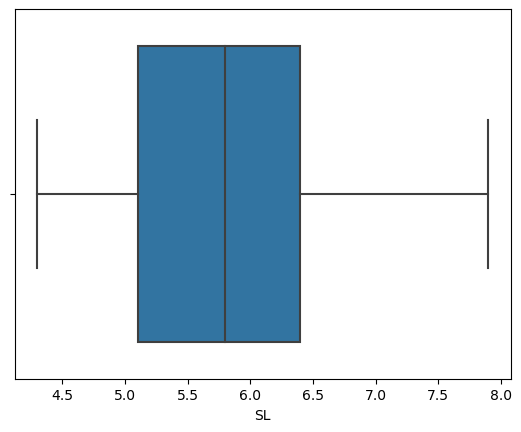

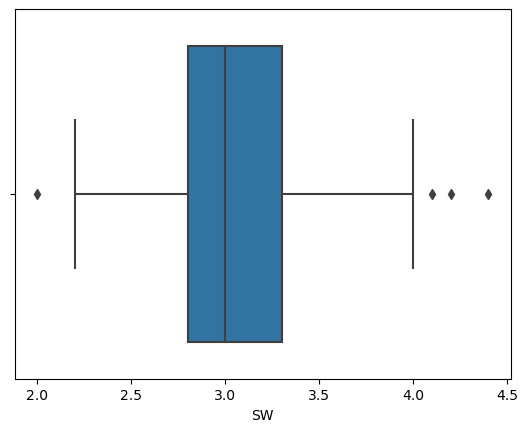

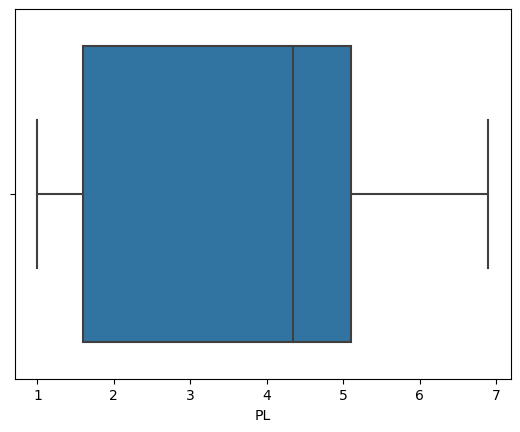

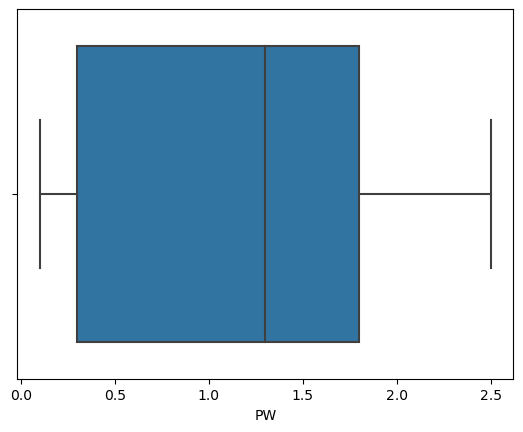

In [10]:
sns.boxplot(x=df['SL'])
plt.show()
sns.boxplot(x=df['SW'])
plt.show()
sns.boxplot(x=df['PL'])
plt.show()
sns.boxplot(x=df['PW'])
plt.show()

In [11]:
sepal_length_mean = df['SL'].mean()
df['SL'].fillna(sepal_length_mean, inplace=True)

sepal_width_median = df['SW'].median()                       # Since the "SW" value has outliers, the missing values was
df['SW'].fillna(sepal_width_median, inplace=True)            # replaced with median

petal_length_mean = df['PL'].mean()
df['PL'].fillna(petal_length_mean, inplace=True)

In [12]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
df = df.round(2)
df.update(df.round(2))

In [14]:
sepal_width = df['SW']

q1, q3 = np.percentile(sepal_width, [25, 75])

iqr = q3 - q1
upper_val = q3 + 1.5*iqr
lower_val = q1 - 1.5*iqr

outliers = df[(df['SW'] < lower_val) | (df['SW'] > upper_val)]

#Adjust the outliers
df.loc[df['SW'] < lower_val, 'SW'] = lower_val

df.loc[df['SW'] > upper_val, 'SW'] = upper_val

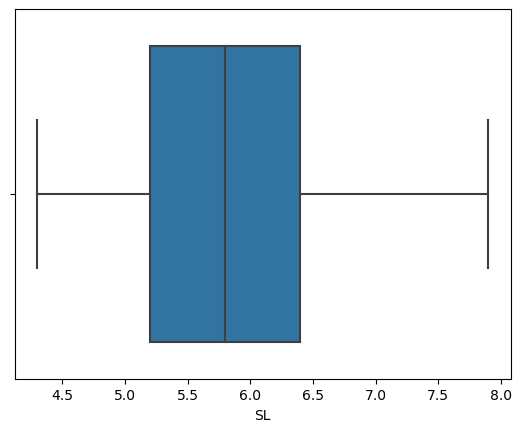

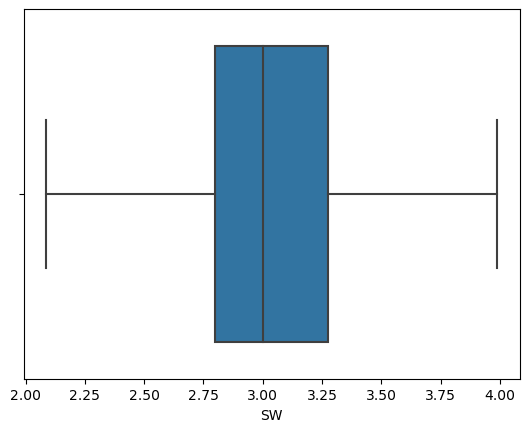

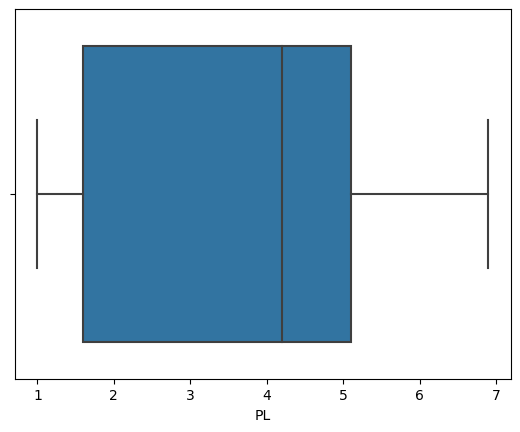

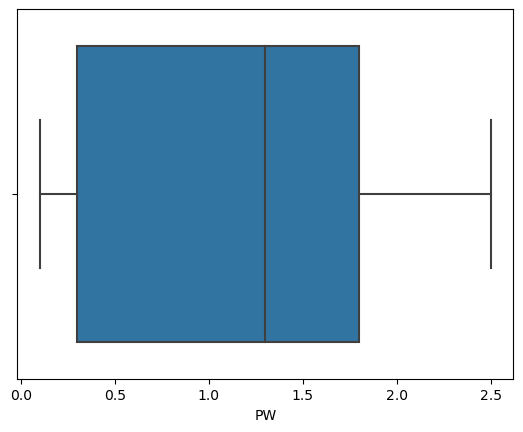

In [15]:
sns.boxplot(x=df['SL'])
plt.show()
sns.boxplot(x=df['SW'])
plt.show()
sns.boxplot(x=df['PL'])
plt.show()
sns.boxplot(x=df['PW'])         # The output has no outliers
plt.show()

In [16]:
#Applying Label Encoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [17]:
df['Classification'].unique()

array([0, 1, 2])

In [18]:
y = df['Classification']
x=df.drop(['Classification'],axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.svm import SVC

svmclf = SVC (kernel = 'linear') 
svmclf.fit(x_train, y_train)

SVC(kernel='linear')

In [21]:
 y_pred_svm = svmclf.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
print('accuracy =' ,accuracy_score (y_test, y_pred_svm))

accuracy = 1.0


In [24]:
print(confusion_matrix(y_test, y_pred_svm))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [25]:
svm_pkl = open('svm.pkl','wb')
pickle.dump(svmclf,svm_pkl)
svm_pkl.close()

In [26]:
le_pkl = open('le.pkl','wb')
pickle.dump(le,le_pkl)
le_pkl.close()

In [37]:
result=svmclf.predict(np.array([6.2,2.2,4.5,1.4]).reshape(1,4))

In [38]:
result[0]

1